# HW2

In [1]:
from mizani.formatters import percent_format
from plotnine import *

import warnings  # to provide a way to handle warnings issued by Python or external libraries. It allows you to control the display and handling of warning messages
import numpy as np  # to provide support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays efficiently
import pandas as pd  # to provide high-performance data structures like DataFrames and Series, along with a wide range of functions to manipulate, clean, and analyze structured data
import matplotlib.pyplot as plt  # to provide a wide variety of functions to create different types of plots and visualizations, allowing you to customize the appearance of your plots extensively
import seaborn as sns  # to provide a high-level interface for creating attractive and informative statistical graphics, making it easier to explore and understand data visually
warnings.filterwarnings("ignore")  # to ensure that warning messages are not displayed during the execution of your code

# Import the prewritten helper functions
from py_helper_functions import *


In [2]:
# Import data
df = pd.read_csv('airbnb_london_workfile.csv')
df.head()

,usd_cleaning_fee,f_property_type,f_room_type,f_room_type2,f_cancellation_policy,f_bed_type,f_neighbourhood_cleansed,usd_price_day,p_host_response_rate,n_accommodates,...,d_tv,d_washer,d_washerdryer,d_wheelchairaccessible,d_wirelessinternet,price,neighbourhood_cleansed,cancellation_policy,room_type,property_type
0,NaN,Apartment,Private room,Private,flexible,Real Bed,Kingston upon Thames,23.0,100.0,1,...,0,1,0,0,1,23.0,Kingston upon Thames,flexible,Private room,Apartment
1,NaN,Apartment,Private room,Private,moderate,Couch,Kingston upon Thames,50.0,100.0,2,...,1,0,0,0,1,50.0,Kingston upon Thames,moderate,Private room,Apartment
2,NaN,Apartment,Private room,Private,flexible,Real Bed,Kingston upon Thames,24.0,NaN,2,...,0,1,0,0,1,24.0,Kingston upon Thames,flexible,Private room,Apartment
3,NaN,House,Private room,Private,flexible,Real Bed,Kingston upon Thames,50.0,NaN,2,...,1,1,0,0,1,50.0,Kingston upon Thames,flexible,Private room,House
4,NaN,House,Private room,Private,flexible,Real Bed,Kingston upon Thames,25.0,100.0,1,...,0,1,0,0,1,25.0,Kingston upon Thames,flexible,Private room,House


# Part 1 PCA

In [3]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

numerical = [var for var in df.columns if df[var].dtype!='O']
df_num = df[numerical]
df_num_imputed = df_num.fillna(df_num.mean())
# Create a MinMaxScaler object
scaler = MinMaxScaler()
# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_imputed)
# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_num_imputed.columns)
df_scaled.head()


,usd_cleaning_fee,usd_price_day,p_host_response_rate,n_accommodates,n_bathrooms,n_review_scores_rating,n_number_of_reviews,n_guests_included,n_reviews_per_month,n_extra_people,...,d_smartlock,d_smokedetector,d_smokingallowed,d_suitableforevents,d_tv,d_washer,d_washerdryer,d_wheelchairaccessible,d_wirelessinternet,price
0,0.067,0.015136,1.000000,0.000000,0.1250,1.000000,0.002525,0.0,0.020680,0.033333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.015136
1,0.067,0.042381,1.000000,0.066667,0.1250,0.887500,0.037879,0.0,0.044029,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.042381
2,0.067,0.016145,0.925813,0.066667,0.1250,0.750000,0.005051,0.0,0.016011,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.016145
3,0.067,0.042381,0.925813,0.066667,0.1875,0.896333,0.000000,0.0,0.086075,0.000000,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.042381
4,0.067,0.017154,1.000000,0.000000,0.1250,0.896333,0.000000,0.0,0.086075,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.017154


Q1: With normalized numerical features, apply Principal Component Analysis (PCA) using Scikit-learn.

- Create a PCA object and fit it to df_scaled.
- Retrieve the principal components and the explained variance ratio.
- Print the shape of the principal components and the explained variance ratio.

In [4]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components shape:")
print(principal_components.shape)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components shape:
(64, 64)

Explained Variance Ratio:
[1.77088353e-01 7.28132923e-02 6.06923574e-02 4.68227746e-02
 4.29386885e-02 3.90620049e-02 3.71940981e-02 3.42148478e-02
 3.40621485e-02 3.14189676e-02 2.73248709e-02 2.50636348e-02
 2.40220358e-02 2.25581465e-02 2.03577093e-02 2.01112749e-02
 1.89882926e-02 1.87937232e-02 1.80836195e-02 1.66886799e-02
 1.62392322e-02 1.57466876e-02 1.44961073e-02 1.38907942e-02
 1.32660497e-02 1.31778875e-02 1.19830156e-02 1.11057096e-02
 1.08919836e-02 1.03096574e-02 9.15090530e-03 8.43055275e-03
 6.83887115e-03 6.13237901e-03 5.79132141e-03 5.31090420e-03
 4.87262432e-03 4.54531320e-03 4.43893862e-03 4.18676595e-03
 3.89786270e-03 2.58784400e-03 2.20929051e-03 1.89131172e-03
 1.58237877e-03 1.33159482e-03 1.13508872e-03 1.07918046e-03
 1.03235180e-03 7.00821613e-04 6.40811186e-04 5.29968313e-04
 4.34439971e-04 3.65886367e-04 3.56591971e-04 3.08737804e-04
 2.22886018e-04 2.19995744e-04 1.41406091e-04 1.22294969e-04
 8.02488339e-05 1.766

Q2:

Try to visualize the explained variance of the Principal Component Analysis (PCA) using a scree plot, and identify the number of components required to explain 75% of the variance.

Please perform the following:

1. Apply PCA to `df_scaled`.
2. Calculate the cumulative explained variance ratio.
3. Identify the number of components that explain at least 75% of the variance.
4. Plot a scree plot to visualize the cumulative explained variance by the principal components. Use a red dashed line to indicate the point at which 75% of the variance is explained.


Your result should be similar to 
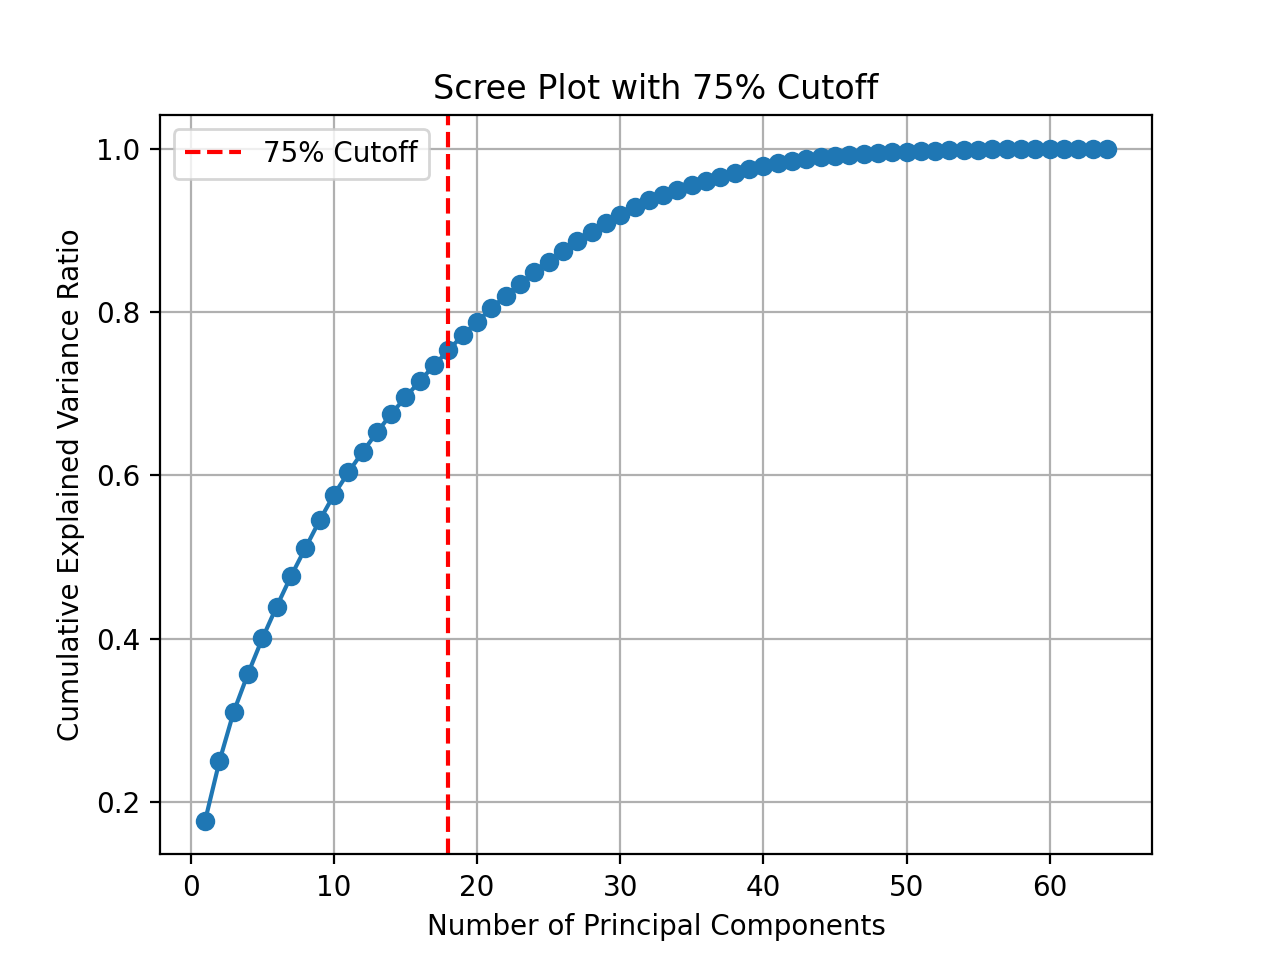

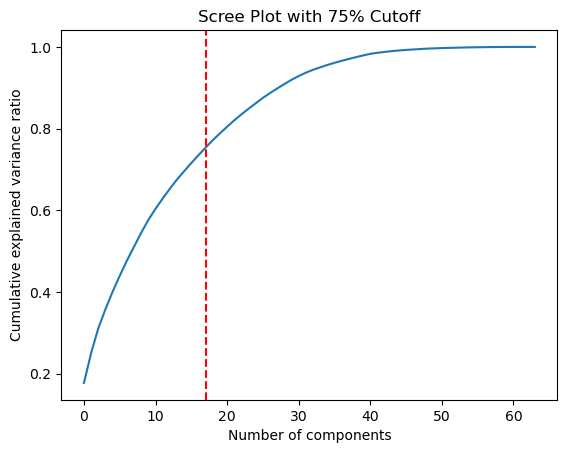

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
index = np.where(explained_variance_ratio >= 0.75)[0][0]

# Plot the scree plot
plt.plot(explained_variance_ratio)
plt.axvline(index, color='red', linestyle='dashed')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Scree Plot with 75% Cutoff')
plt.show()


Q3

Your task is to create a loading plot for the first two principal components.

Please follow these steps:

- Apply PCA with two components to df_scaled and transform it.
- Retrieve the loadings for each component.
- Create a scatter plot of the loadings for the first two principal components (PC1 and PC2).
- Add labels for each feature to the scatter plot.

Your result should be similar to 

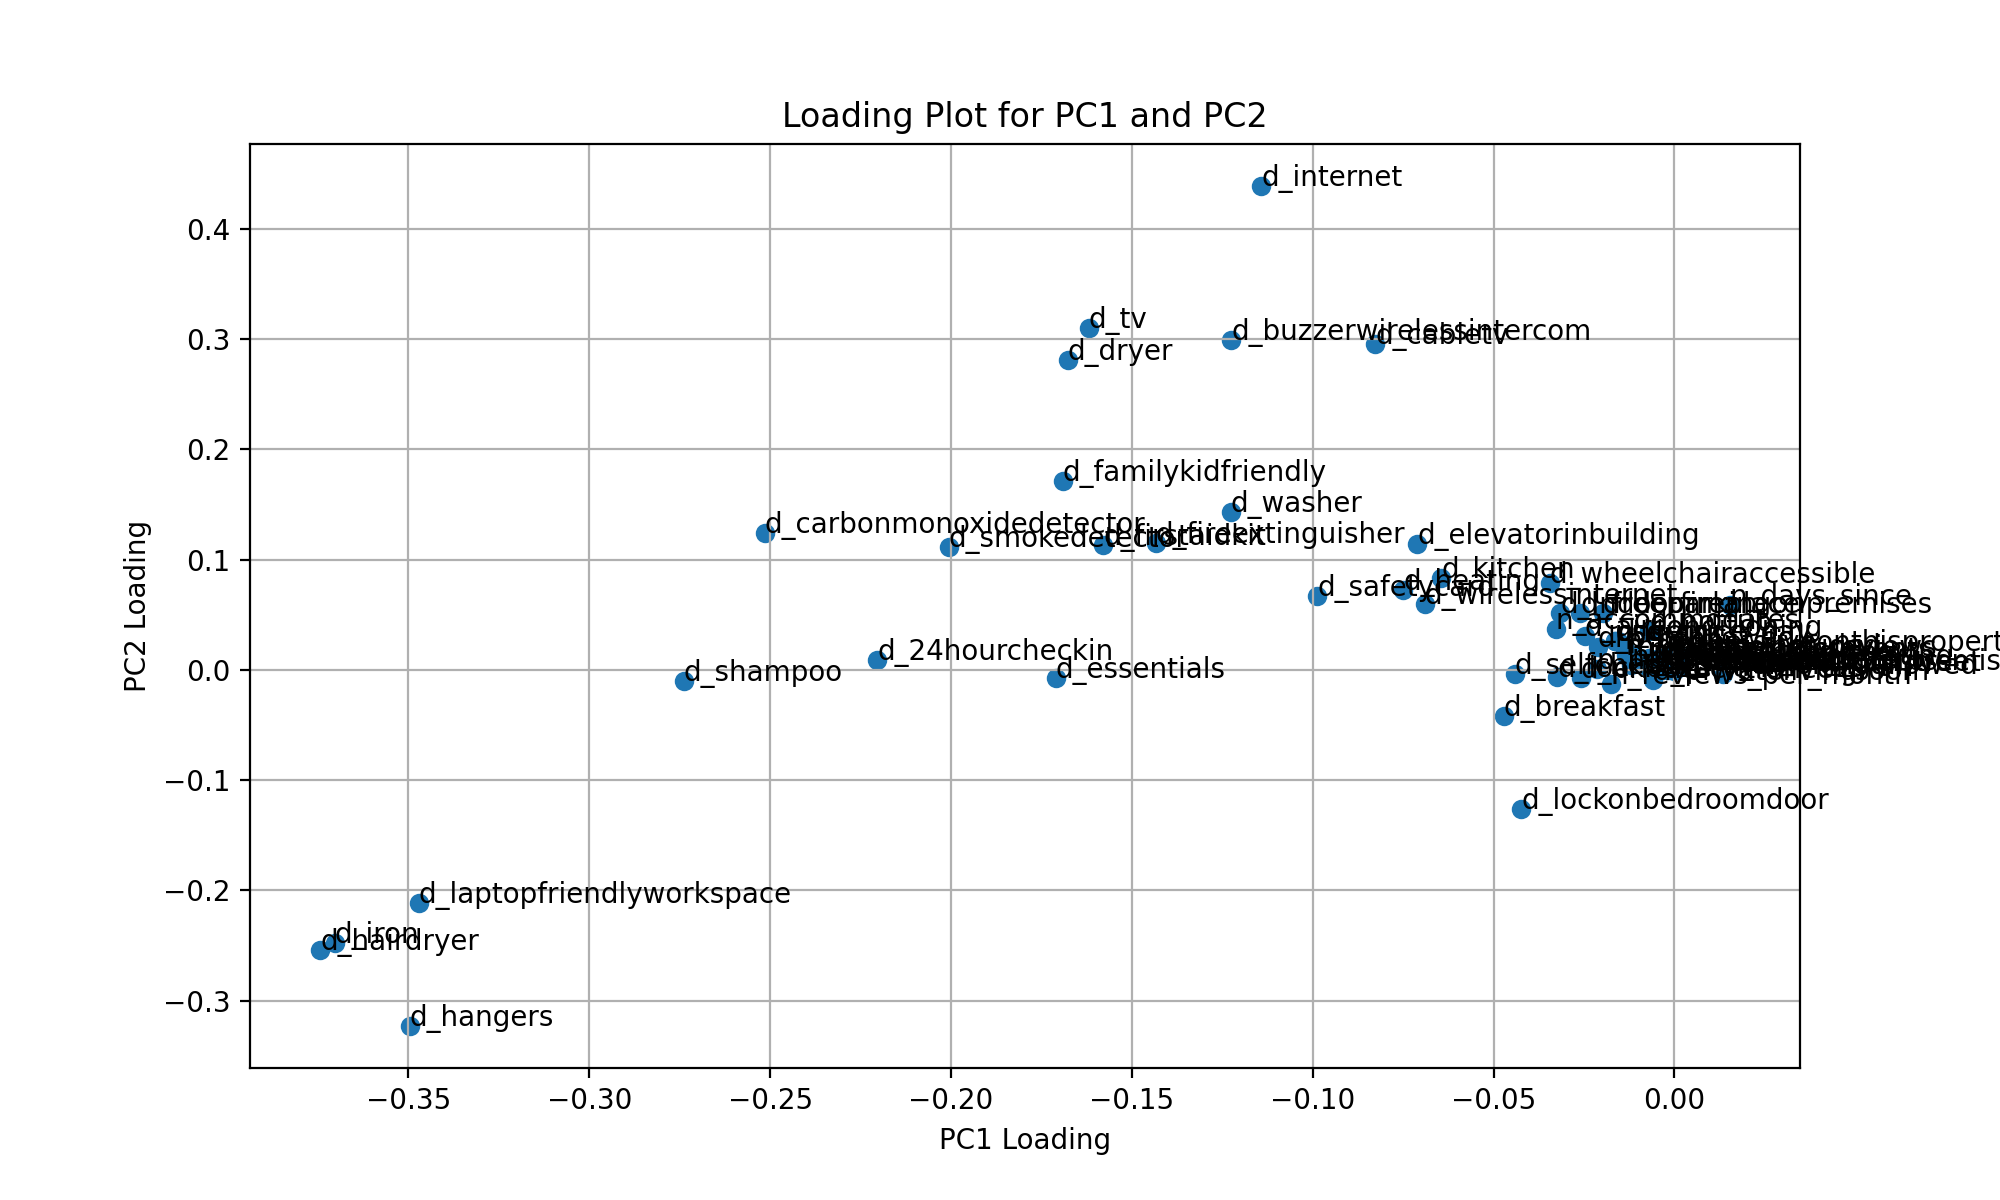

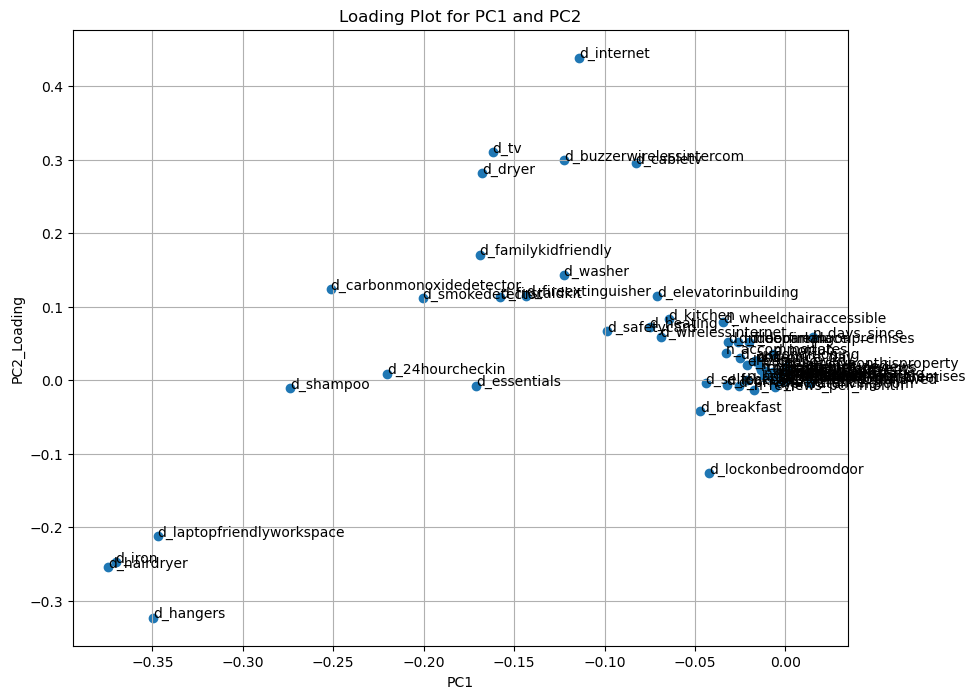

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Fill NAs in original df with mean of each column
df_filled = df.fillna(df.mean())

# Select numerical columns
numerical = [var for var in df_filled.columns if df_filled[var].dtype!='O']
df_num = df_filled[numerical]

# Scale data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)

# Convert scaled data to new df
df_scaled = pd.DataFrame(scaled_data, columns=df_num.columns)

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 8))
plt.scatter(loadings[:, 0], loadings[:, 1])

# Add labels for each feature
for i, txt in enumerate(df_scaled.columns):
    plt.annotate(txt, (loadings[i, 0], loadings[i, 1]))

plt.xlabel('PC1')
plt.ylabel('PC2_Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)
plt.show()


# Part 2 Data Aggregation

Q4 

The `df` includes a column named "usd_price_day", representing the airbnb price per day in USD. Your task is to create a histogram to visualize the distribution of this price using the `ggplot` function from the `plotnine` library.


Your result should be similar to 
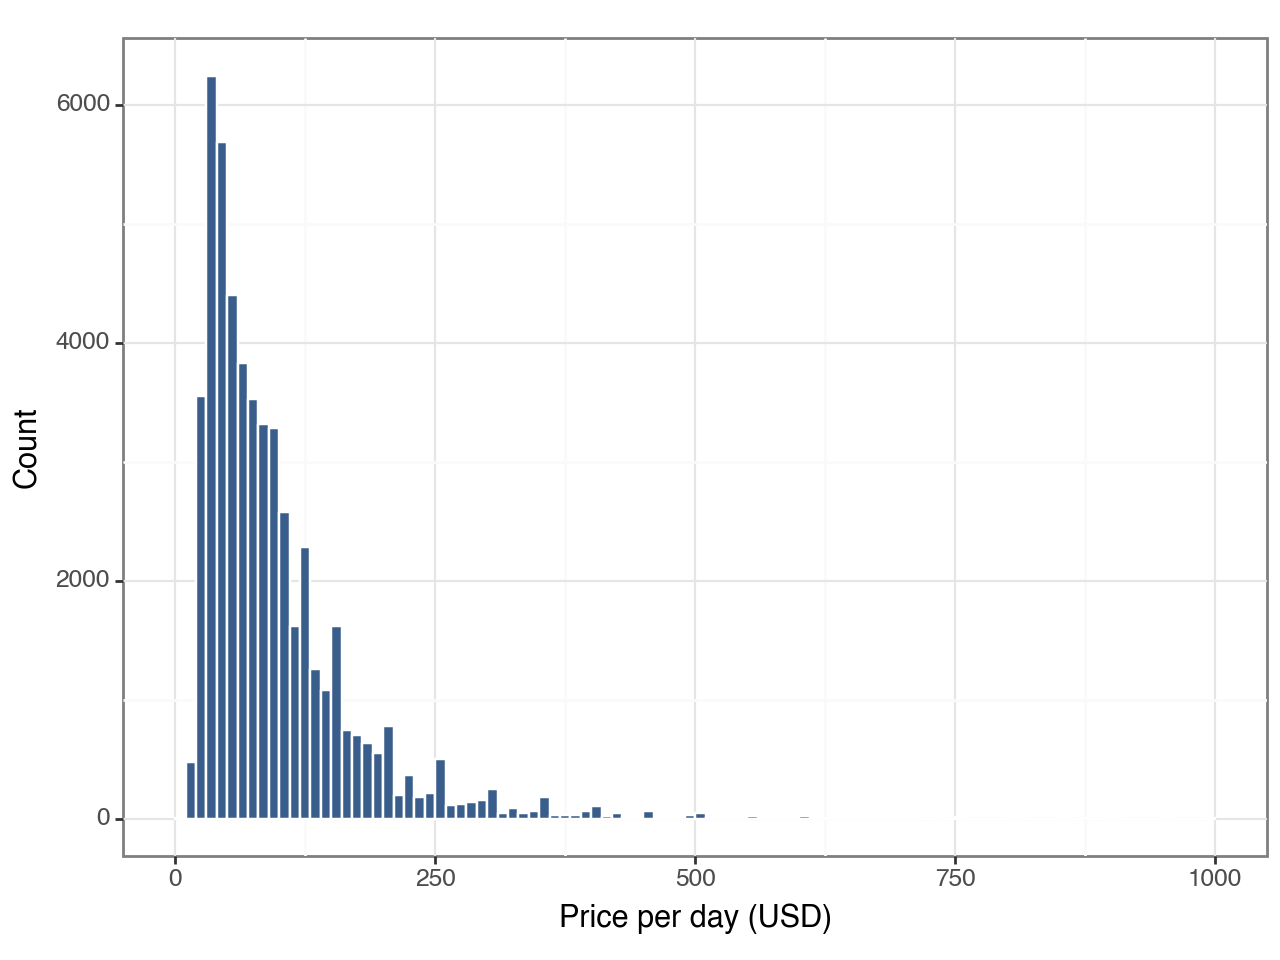

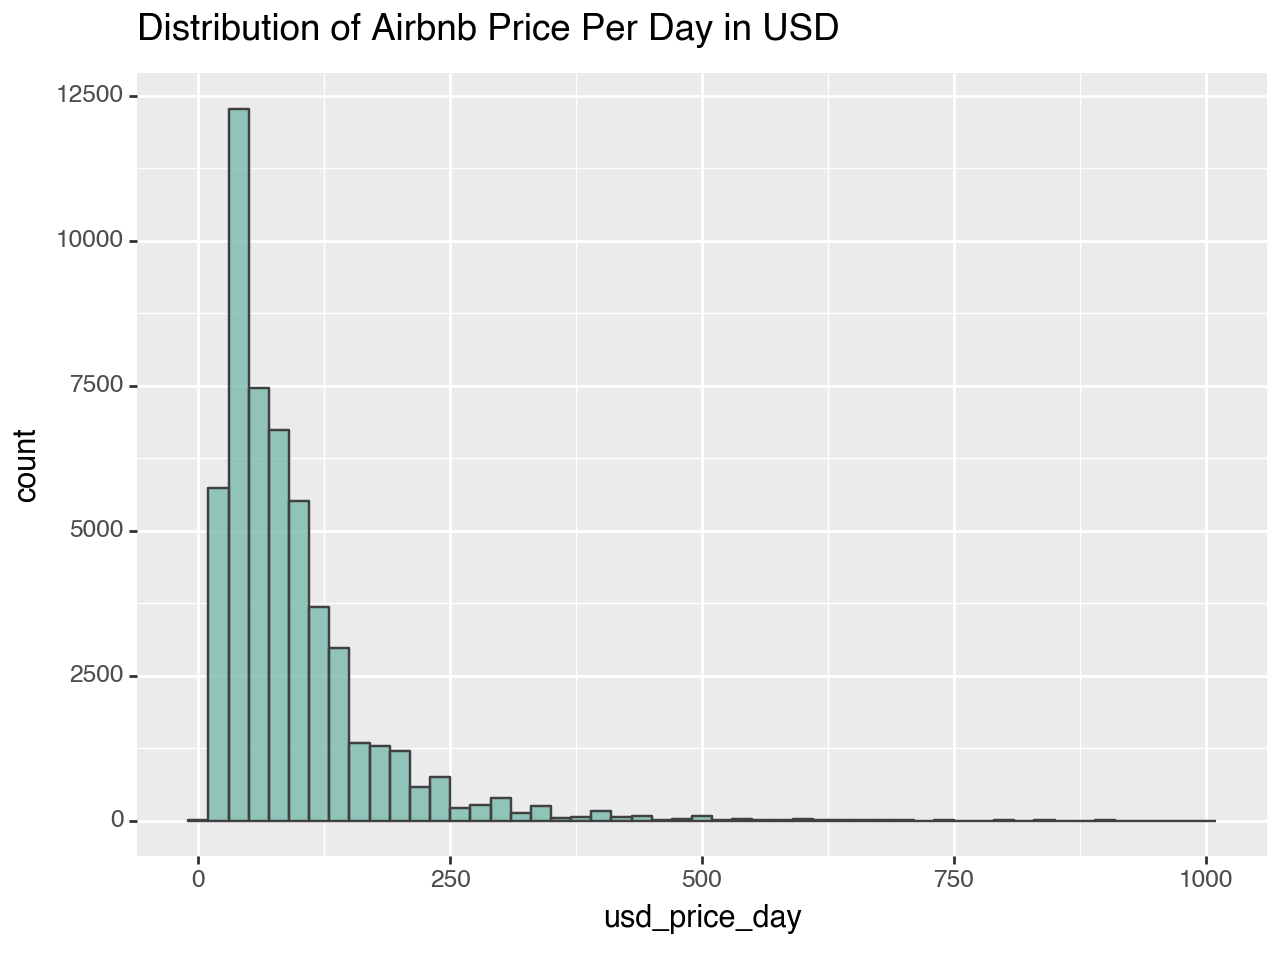

<Figure Size: (640 x 480)>

In [8]:
(
    ggplot(df, aes(x="usd_price_day")) 
    + geom_histogram(binwidth=20, fill="#69b3a2", color="#404040", alpha=0.7)
    + ggtitle("Distribution of Airbnb Price Per Day in USD")
)


Q5

Generate a bar plot using `ggplot` from the `plotnine` library, showing the distribution of room types across different property types in percentage.

Please follow these steps:

- Group the DataFrame by "f_property_type" and "f_room_type" and count the number of occurrences. Store the result in df1.
- Calculate the total count per property type and the percentage of each room type per property type.
- Convert the "f_room_type" and "f_property_type" columns into categorical types, sorted in reverse order.
- Create a bar plot with "f_property_type" on the x-axis and the calculated percentage on the y-axis. Each bar should be filled with colors representing different room types.

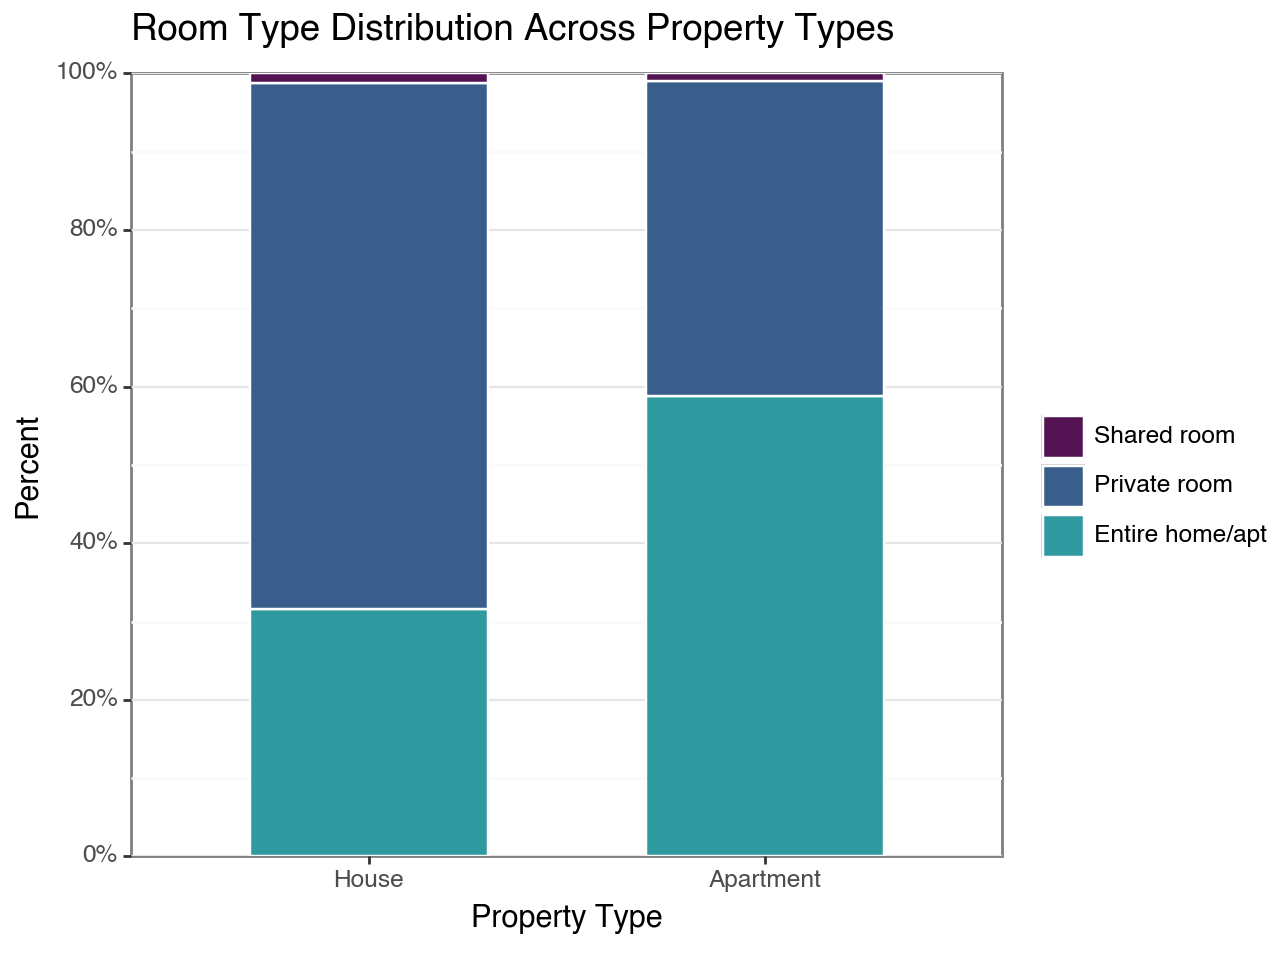

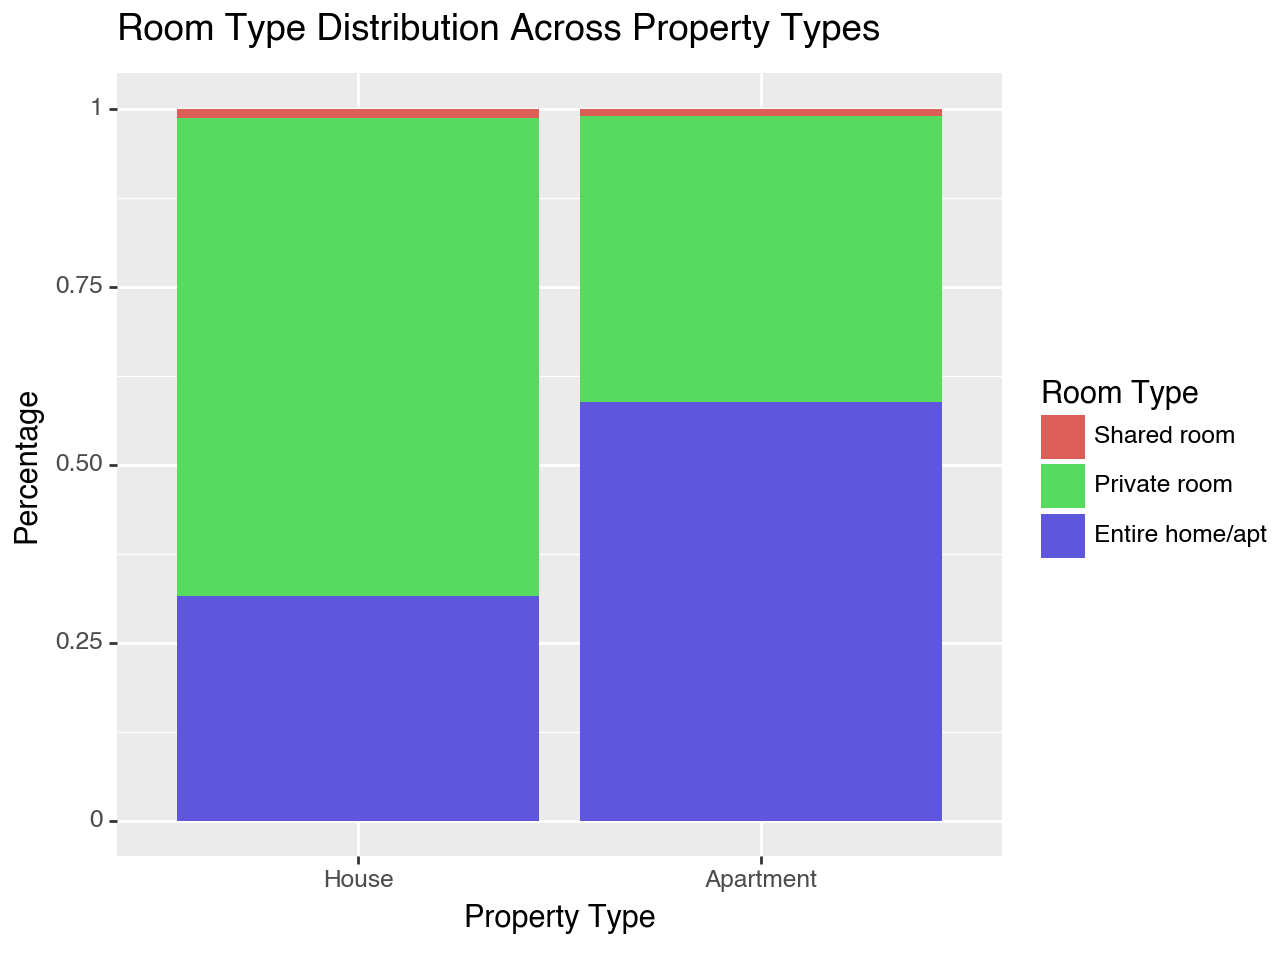

<Figure Size: (640 x 480)>

In [9]:
# Group the DataFrame by "f_property_type" and "f_room_type" and count the number of occurrences
df1 = df.groupby(["f_property_type", "f_room_type"]).size().reset_index(name='Count')

# Calculate the total count per property type
df1["Group_count"] = df1.groupby("f_property_type")["Count"].transform('sum')

# Calculate the percentage of each room type per property type
df1["Percent"] = df1["Count"] / df1["Group_count"]

# Convert the "f_room_type" and "f_property_type" columns into categorical types, sorted in reverse order
df1["f_room_type"] = pd.Categorical(df1["f_room_type"], categories=df1["f_room_type"].unique()[::-1])
df1["f_property_type"] = pd.Categorical(df1["f_property_type"], categories=df1["f_property_type"].unique()[::-1])

# Create a bar plot with "f_property_type" on the x-axis and the calculated percentage on the y-axis
(
    ggplot(df1, aes(x='f_property_type', y='Percent', fill='f_room_type'))
    + geom_bar(stat='identity', position='stack')
    + labs(x='Property Type', y='Percentage', title='Room Type Distribution Across Property Types', fill='Room Type')
)


Q6

The column "usd_price_day" contains daily prices in USD. The column "n_review_scores_rating" contains review scores.

Your task is to create a boxplot showing the distribution of review scores across three price bins: "Low" (price < 50), "Medium" (50 ≤ price < 300), and "High" (price ≥ 300).

- Create a new column "price3bins" that categorizes the "usd_price_day" into the three price bins.
- Convert the "price3bins" column into a categorical type, sorted in ascending order.
- Plot a boxplot using ggplot from the plotnine library, with "price3bins" on the x-axis and "n_review_scores_rating" on the y-axis. The y-axis should range from 70 to 100 with increments of 10.
- Label the x-axis as "Price Bins" and the y-axis as "Review Scores Rating". Add a title "Review Scores Rating by Price Bins" to the plot.

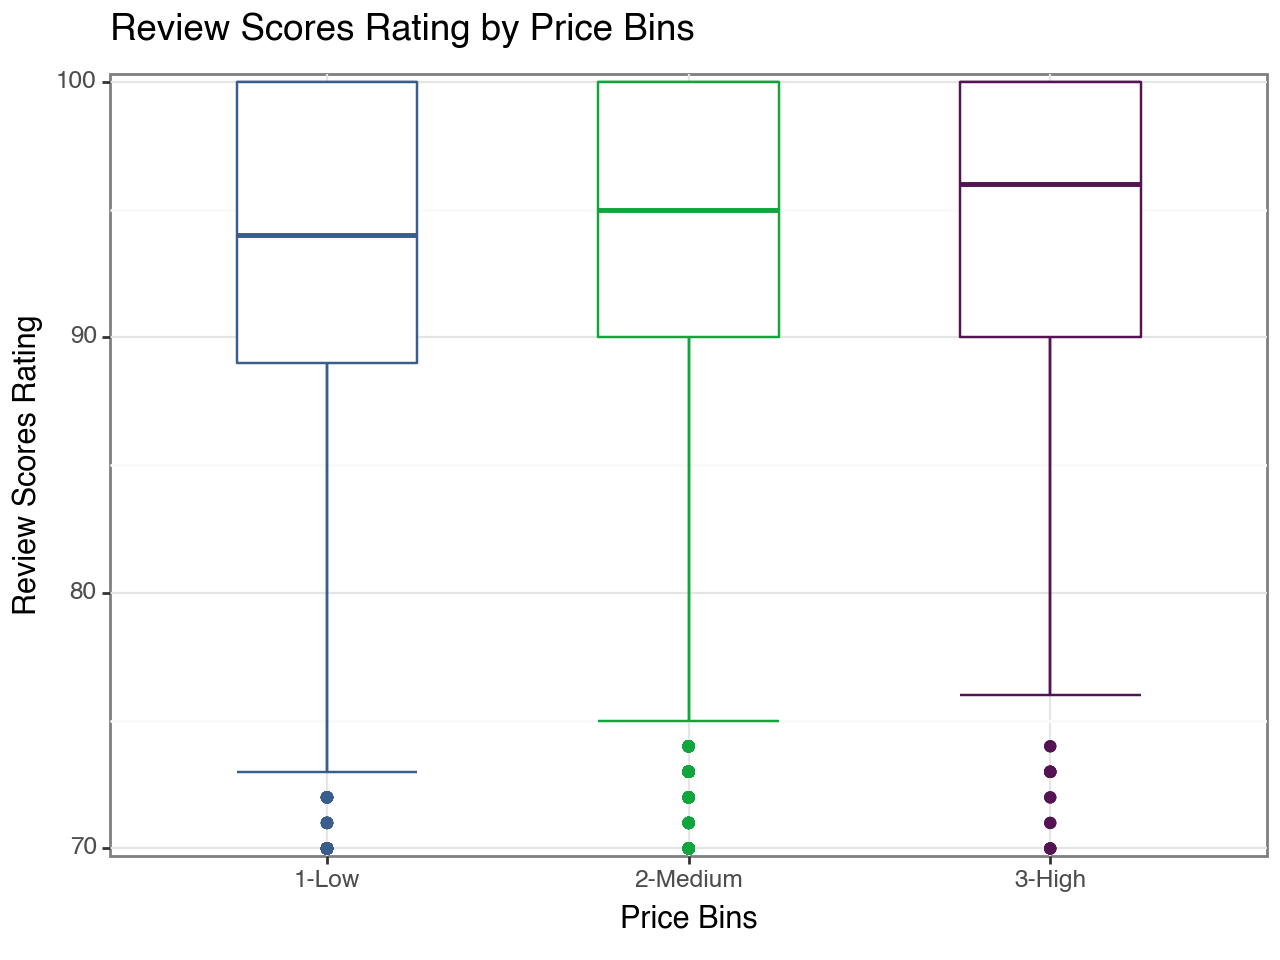

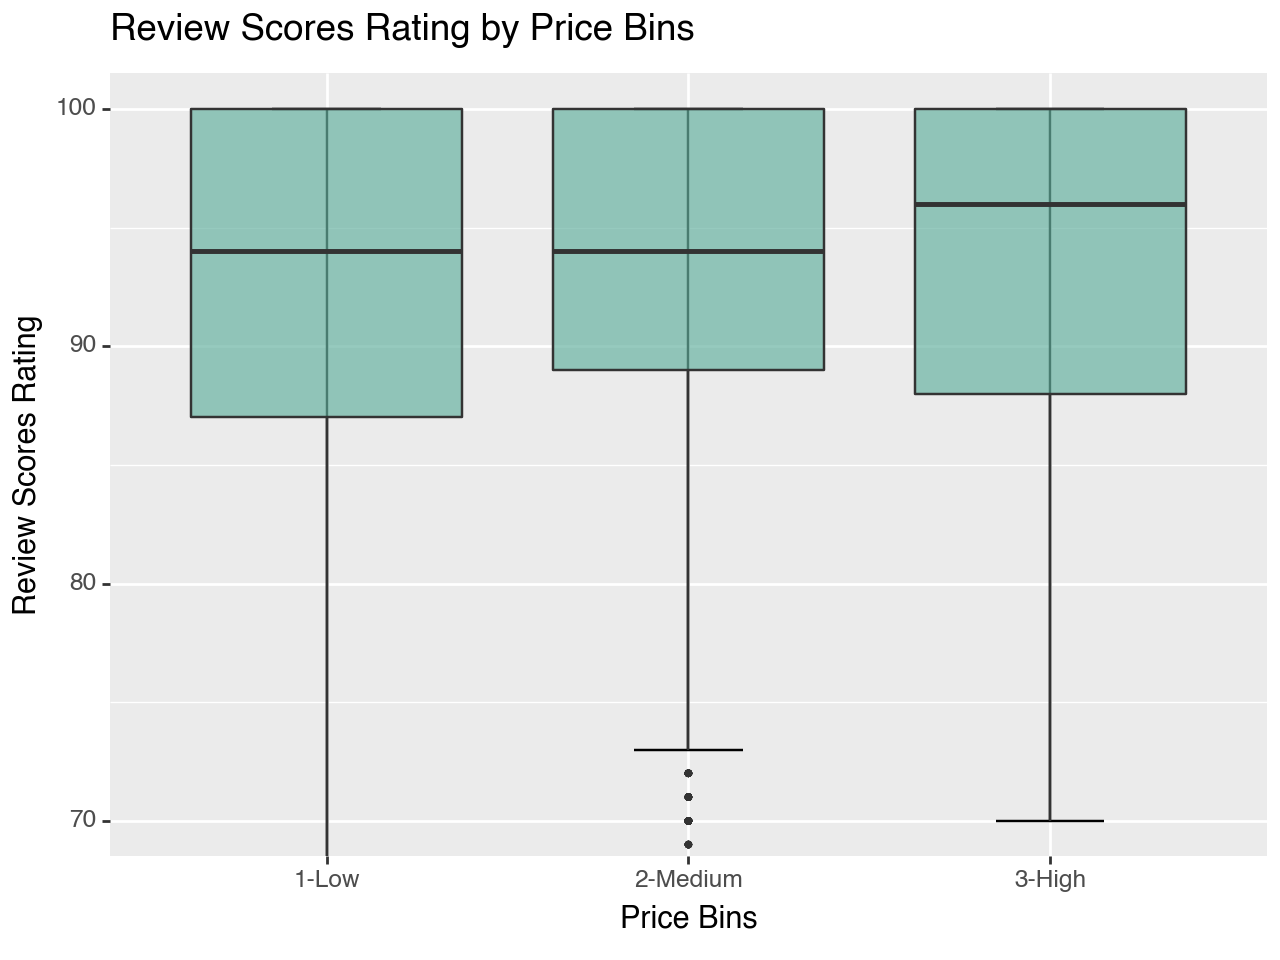

<Figure Size: (640 x 480)>

In [10]:
# Don't modify the next line
df_drop = df.dropna(subset=['usd_price_day'])

# Create a new column "price3bins" that categorizes the "usd_price_day" into the three price bins
df_drop["price3bins"] = pd.cut(df_drop["usd_price_day"], bins=[0, 50, 300, np.inf], labels=[1, 2, 3])

# Replace numerical labels with descriptive labels
df_drop = df_drop.replace({"price3bins": {1: "1-Low", 2: "2-Medium", 3: "3-High"}})

# Convert the "price3bins" column into a categorical type, sorted in ascending order
df_drop['price3bins'] = pd.Categorical(df_drop['price3bins'], categories=["1-Low", "2-Medium", "3-High"], ordered=True)

# Plot
(
    ggplot(df_drop, aes(x='price3bins', y='n_review_scores_rating'))
    + stat_boxplot(geom='errorbar', width=0.3)
    + geom_boxplot(fill="#69b3a2", alpha=0.7, outlier_shape='.')
    + labs(x='Price Bins', y='Review Scores Rating', title='Review Scores Rating by Price Bins')
    + scale_y_continuous(breaks=range(70, 101, 10))
    + coord_cartesian(ylim=[70, 100])
)

# Part 3 Regression

Q7

Your task is to create a scatter plot with a regression line using ggplot from the plotnine library, to analyze the relationship between "usd_price_day" and "n_review_scores_rating" for apartments in the Westminster neighborhood.



The ouput should be similar to 

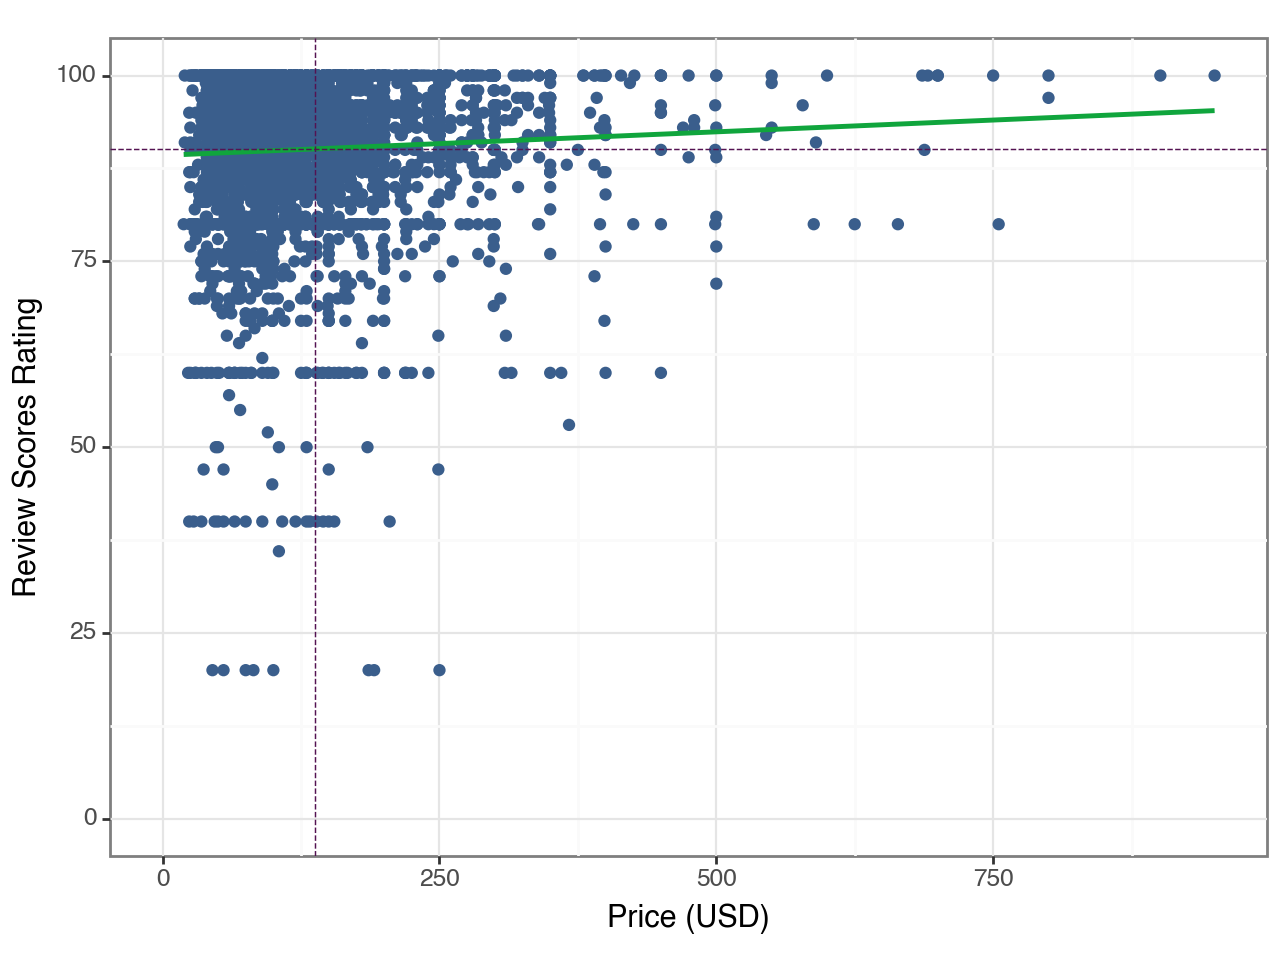

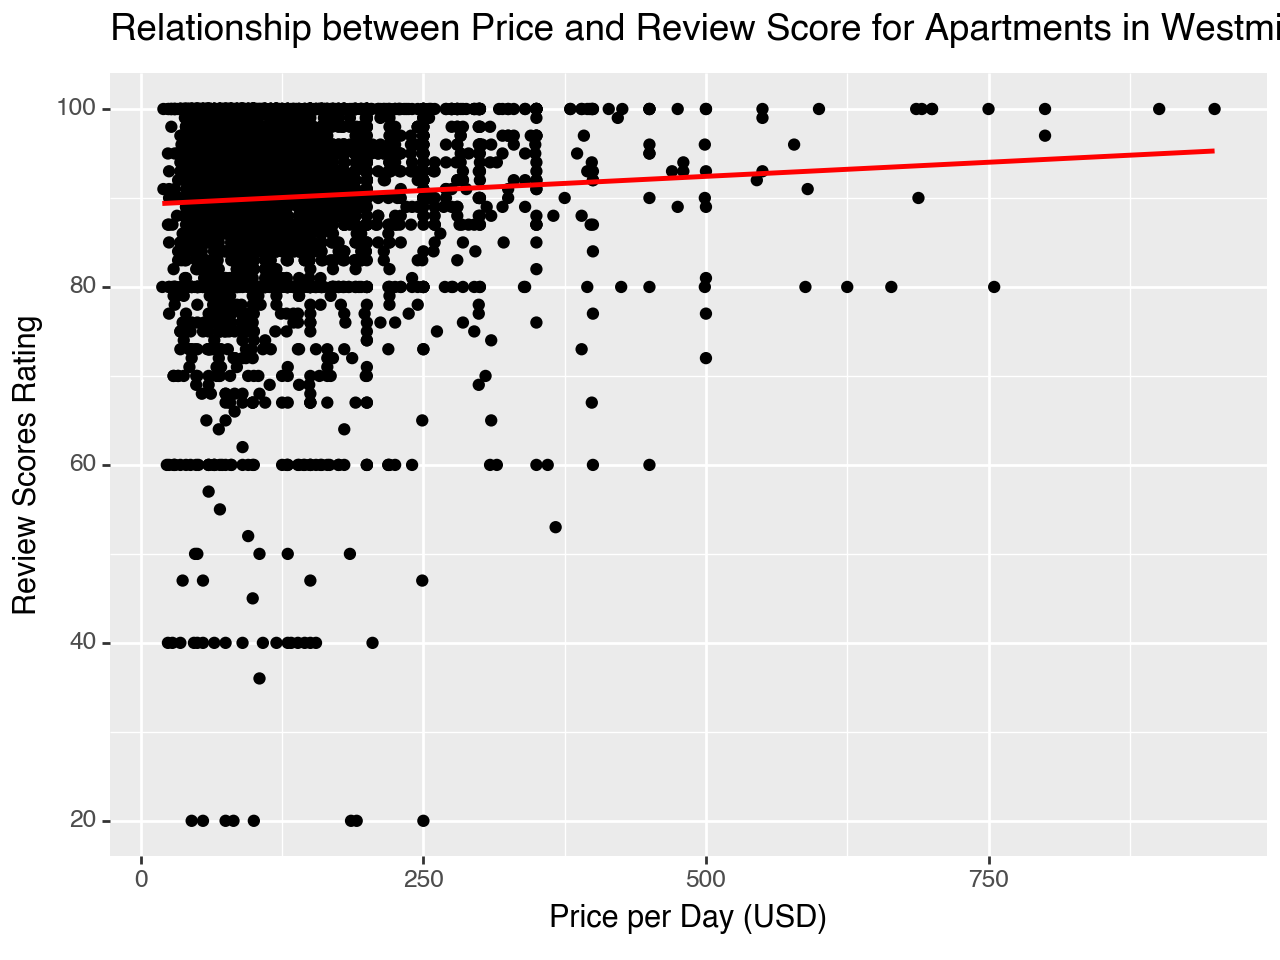

In [11]:
df_apt_wes = df[(df['f_property_type'] == 'Apartment') & (df["f_neighbourhood_cleansed"]=='Westminster')]

# Since p1 is redundant, we can stick with plotting reg_price_rating
reg_price_rating = (
    ggplot(df_apt_wes, aes(x="usd_price_day", y="n_review_scores_rating"))
    + geom_point()  # Create a scatter plot
    + stat_smooth(method='lm', color='red', se=False)
    + labs(x='Price per Day (USD)', y='Review Scores Rating', title='Relationship between Price and Review Score for Apartments in Westminster')
)

print(reg_price_rating)
